[32.86111111]


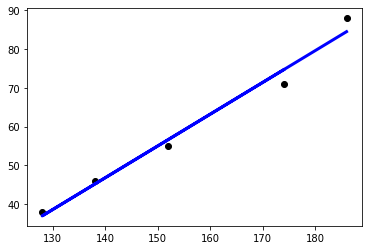

In [5]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()
X = [[174],[152],[138],[128],[186]]
y = [71,55,46,38,88]
reg.fit(X, y)

print(reg.predict([[123]]))

#학습데이터와 y값을 산포도로 그린다.
plt.scatter(X, y, color = 'black')

#학습데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

#학습데이터와 예측값으로 선그래프로 그린다.
#계산된 기울기와 y절편을 가지는 직선이 그려진다.
plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

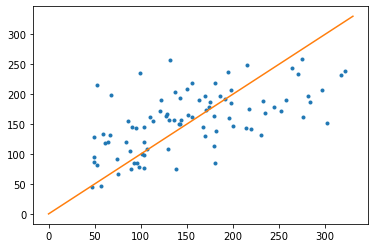

In [6]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

#당뇨병 데이터 세트를 적재한다.
diabetes = datasets.load_diabetes()

#학습 데이터와 테스트 데이터를 분리한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size =0.2, random_state = 0)

#선형 회귀 모델로 학습을 수행한다.
model = LinearRegression()
model.fit(X_train, y_train)

#테스트 데이터로 예측해보자.
y_pred = model.predict(X_test)

#실제 데이터와 예측 데이터를 비교해보자.
plt.plot(y_test, y_pred,'.')

#직선을 그리기 위하여 완벽한 선형 데이터를 생성한다.
x = np.linspace(0 ,330, 100)
y = x
plt.plot(x, y)
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

#degree =2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree =2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [12]:
#3차 다항식 결정값을 구하는 함수 polynomial_func(x)생성. 즉 회귀식은 결정값
# y= 1 + 2 * _1 + 3 * _1^2 + 4 * _2^3
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    print(X[:,0])
    print(X[:,1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값 : 
 [  5 125]


In [13]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature :\n', poly_ftr)

#Linear Regression 에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('polynomial 회귀계수\n', np.round(model.coef_, 2))
print('polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
polynomial 회귀 shape : (10,)


In [21]:
#사이킷런 파이프라인을 이용하여 3차 다항회귀 학습
#사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

#pipeline 객체로 Streamline하게 Polynomial Reature변환과 Linear Regression 을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X,y)
print('Polynomial 회귀 계수 : \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 : 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardScaler()로 평균이 0. 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용하여 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [31]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

#넘파이 데이터 셋을Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


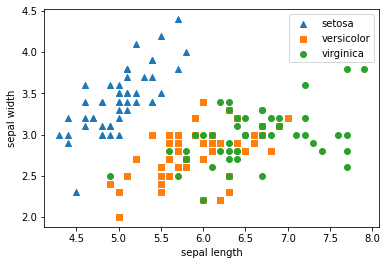

In [32]:
markers=['^','s','o']

for i,marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker , label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [35]:
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


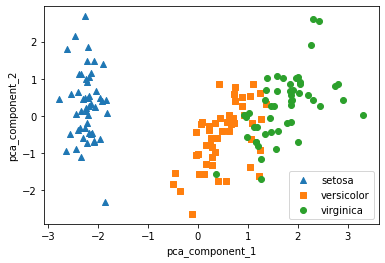

In [36]:
markers=['^','s','o']
for i,marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker , label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [37]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]
